1. Linear Regression w/ "closed form" equation
2. Linear Regression w/ Gradient Descent
3. Polynomial Regression
4. Logistic Regression
5. Softmax Regression

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

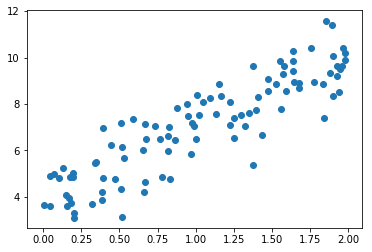

In [49]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)

In [50]:
# Normal equation
X_b = np.c_[np.ones((100, 1)), X] # Add x0 = 1 to each instance
x_transpose = X_b.T
x_dot_inv = np.linalg.inv(x_transpose.dot(X_b))
theta_best = x_dot_inv.dot(x_transpose).dot(y)
theta0, theta1 = theta_best
print(theta0, theta1)

[ 3.89983341] [ 3.07999155]


In [51]:
# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.89983341],
       [ 10.05981652]])

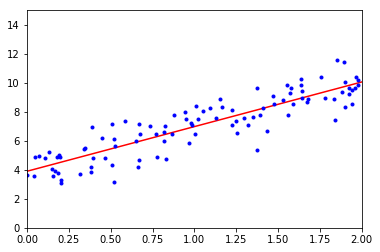

In [52]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [53]:
# Scikit-Learn equivalent
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[ 3.89983341] [[ 3.07999155]]


array([[  3.89983341],
       [ 10.05981652]])

Normal equation gets very slow when features grow large.
For every feature, the computation time grows between 5.3 to 8 times.
O(n^2.4) to O(n^3)

The equation is linear (O(n)) with regards to the number of instances in the training set ((O(m)).

# Gradient Descent

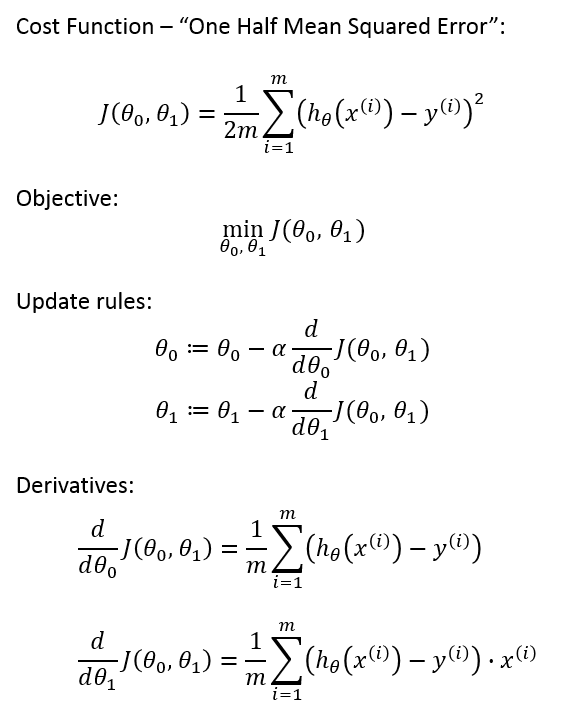

In [61]:
Image(filename='images/formulas.png')

In [54]:
# Batch Gradient Descent
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # Random initialization

for iteration in range(n_iterations):
    # Gradient vector of the cost function
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)
    
theta # Same as the Normal Equation result

array([[ 3.89983341],
       [ 3.07999155]])

# Stochastic Gradient Descent

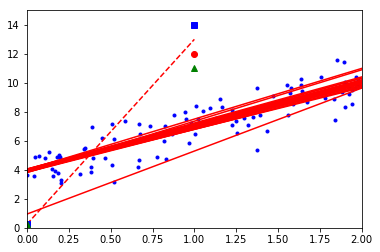

array([[ 3.89276198],
       [ 3.04804284]])

In [91]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # Random initialization

plt.clf()
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule((epoch * m) + 1)
        theta = theta - (eta * gradients)

        if i < 1:
            # Make predictions
            X_new = np.array([[0], [2]])
            X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to each instance
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')

plt.plot([0.25, 12], 'ro')
plt.plot([0.25, 13], 'r--')
plt.plot([0.25, 14], 'bs')
plt.plot([0.25, 11], 'g^')
plt.show()

theta

In [87]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.intercept_, sgd_regressor.coef_

(array([ 3.8739546]), array([ 3.04790665]))

# Mini-batch Gradient Descent